**TASK 2 Part 2 :Training a CNN on the dataset of digits (0-9)**

Mounting drive and collecting colab to it.Dataset has been uploaded to drive 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Essential Imports 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import os
from pathlib import Path 
import shutil
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *

Analysing directory and its folders using os module 

In [ ]:
p=Path("/content/drive/MyDrive/mnistTask2/train")

In [ ]:
dirs = p.glob("*")

In [ ]:
folders = os.listdir("/content/drive/MyDrive/mnistTask2/train")


Generating labels for the images

In [ ]:
for f in dirs :
  print (f)
  label=str(f).split("\\")[-1][47:]
  print(label)

/content/drive/MyDrive/mnistTask2/train/Sample006
06
/content/drive/MyDrive/mnistTask2/train/Sample004
04
/content/drive/MyDrive/mnistTask2/train/Sample003
03
/content/drive/MyDrive/mnistTask2/train/Sample007
07
/content/drive/MyDrive/mnistTask2/train/Sample002
02
/content/drive/MyDrive/mnistTask2/train/Sample001
01
/content/drive/MyDrive/mnistTask2/train/Sample010
10
/content/drive/MyDrive/mnistTask2/train/Sample005
05
/content/drive/MyDrive/mnistTask2/train/Sample008
08
/content/drive/MyDrive/mnistTask2/train/Sample009
09


In [ ]:
print(folders)

['Sample006', 'Sample004', 'Sample003', 'Sample007', 'Sample002', 'Sample001', 'Sample010', 'Sample005', 'Sample008', 'Sample009']


Below is the code to see the number of images in each folder

In [ ]:
for f in folders:
  path = "/content/drive/MyDrive/mnistTask2/train/" + f
  print(len(os.listdir(path)))

40
40
40
40
40
40
40
40
40
40


**Data Preprocessing**
> **Steps are -**
1. Generating correct labels according to digits and converting to integer.
2. Used keras "image" module to load images and images to array conversion so as to feed these images to model.  
3. Converting to grayscale and reshaping to 28x28. 
> Grayscale conversion has been done because at the end I have to compare the results with the mnist dataset which is a grayscale images dataset with 28x28 dimensional images.Also with 900 x 1200 which is the actual size of images,  huge sparse array for each image got generated.
4. Normalisation by dividing by 255 such that pixel values come under the range of 0-1.   
5. Finally appending images and labels in separate lists.

In [ ]:
images=[]
labels=[]

for folder_name in dirs :
  label=str(folder_name).split("\\")[-1][47:]
  label =  int(label)-1 
  print(label)
  for img_path in folder_name.glob("*.png"):
    labels.append(label)
    data1 = image.load_img(img_path , color_mode="grayscale" , target_size =(28,28))
    img_array = image.img_to_array(data1)/255.0

    images.append(img_array)
    
    

5
3
2
6
1
0
9
4
7
8


Converting to numpy array so as to further save it as a .npy file having proper images and labels

In [ ]:
images = np.asarray(images)
labels =np.asarray(labels)

In [ ]:
np.save('/content/drive/MyDrive/images0-9.npy' , images)
np.save('/content/drive/MyDrive/labels0-9.npy' , labels)

Loading the saved .npy files

In [ ]:
images = np.load('/content/drive/MyDrive/images0-9.npy')
labels = np.load('/content/drive/MyDrive/labels0-9.npy')


Shuffling the images for generalisation and avoiding overfitting  

In [ ]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [ ]:
s_images,s_labels= shuffle_in_unison(images, labels)

Plotting images with their labels to be sure after shuffling 

In [ ]:
def drawImg(x,y):
  for i in range(1,3):
    print(y[i])
    plt.imshow(x[i].reshape(28,28))
    plt.show()

9


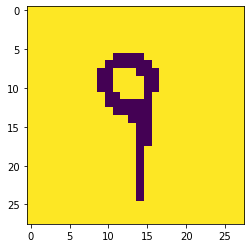

7


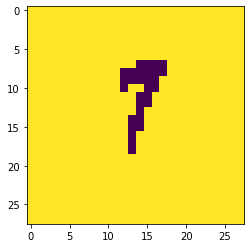

In [ ]:
drawImg(s_images, s_labels)

Analysing the shapes of images and labels to be fed to the model

In [ ]:
s_images.shape

(400, 28, 28, 1)

In [ ]:
s_labels

array([7, 9, 7, 7, 6, 1, 1, 8, 9, 1, 1, 8, 5, 3, 7, 7, 1, 7, 0, 1, 2, 0,
       0, 2, 0, 5, 4, 2, 8, 0, 8, 7, 9, 7, 4, 9, 3, 1, 1, 8, 5, 3, 6, 2,
       8, 3, 8, 5, 2, 3, 6, 4, 5, 2, 6, 8, 1, 0, 9, 2, 7, 9, 7, 2, 5, 3,
       8, 9, 4, 6, 4, 1, 5, 4, 4, 2, 7, 5, 1, 6, 6, 9, 6, 7, 3, 0, 1, 2,
       3, 7, 4, 5, 7, 8, 2, 6, 6, 1, 6, 4, 3, 5, 6, 5, 2, 3, 6, 8, 0, 6,
       9, 1, 1, 1, 2, 6, 4, 3, 1, 9, 8, 0, 3, 9, 4, 9, 9, 2, 8, 6, 2, 3,
       0, 0, 4, 9, 3, 1, 2, 0, 0, 2, 0, 7, 1, 3, 4, 7, 7, 0, 5, 2, 6, 5,
       4, 6, 8, 9, 0, 6, 1, 1, 4, 1, 7, 2, 1, 4, 9, 5, 3, 9, 8, 5, 4, 8,
       9, 5, 9, 1, 1, 3, 6, 5, 7, 0, 2, 3, 7, 8, 6, 7, 0, 0, 5, 4, 6, 3,
       8, 5, 2, 1, 5, 3, 3, 0, 9, 6, 8, 5, 9, 1, 9, 7, 0, 2, 3, 3, 2, 8,
       4, 0, 3, 8, 0, 4, 6, 4, 4, 0, 4, 5, 2, 6, 5, 2, 2, 7, 2, 3, 9, 4,
       2, 4, 0, 8, 7, 5, 6, 7, 1, 8, 5, 1, 8, 7, 3, 6, 6, 6, 9, 0, 3, 9,
       9, 3, 5, 7, 0, 1, 1, 7, 6, 6, 4, 1, 5, 6, 4, 2, 5, 5, 0, 9, 4, 2,
       5, 7, 7, 0, 9, 8, 9, 5, 7, 0, 6, 8, 7, 0, 4,

Making one-hot encoder of the labels to be fed to the CNN model 

In [ ]:
s_labels = to_categorical(s_labels)

In [ ]:
print(s_labels.shape)

(400, 10)


In [ ]:
print(s_labels)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Proposed Model**
> 1.Since the dataset contains digit and alphabets images unlike complex images, thus I focus to make a simple model od 3 hidden layers and a dense layer at the end with neurons = number of classes.

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape =(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64 , (3,3),activation ='relu'  ))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3) , activation= 'relu' ))
model.add(MaxPool2D((2,2)))
 
 
model.add(Flatten())
 
model.add(Dense (10 ,activation ='softmax'))

**Final Compilation and Training**
> Compilation and checkpoint based on Validation Accuracy 

> Loss is taken as categorical_cross entropy because there are more than 2 classes.


In [ ]:
model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("best_model.h5" , monitor ='val_accuracy' ,verbose =0 , save_best_only =True , save_weights_only =False, mode='auto', period=1 )



In [ ]:
model.fit(s_images , s_labels,validation_split =0.1, epochs = 25 , batch_size=16, callbacks=[checkpoint])

Epoch 1/25
23/23 [==============================] - 1s 38ms/step - loss: 2.3189 - accuracy: 0.0842 - val_loss: 2.2922 - val_accuracy: 0.1750
Epoch 2/25
23/23 [==============================] - 0s 17ms/step - loss: 2.2758 - accuracy: 0.1649 - val_loss: 2.2482 - val_accuracy: 0.2000
Epoch 3/25
23/23 [==============================] - 0s 17ms/step - loss: 2.2197 - accuracy: 0.2293 - val_loss: 2.2008 - val_accuracy: 0.3000
Epoch 4/25
23/23 [==============================] - 0s 17ms/step - loss: 2.1064 - accuracy: 0.2927 - val_loss: 2.0422 - val_accuracy: 0.2250
Epoch 5/25
23/23 [==============================] - 0s 19ms/step - loss: 1.9504 - accuracy: 0.3582 - val_loss: 1.7782 - val_accuracy: 0.3750
Epoch 6/25
23/23 [==============================] - 0s 18ms/step - loss: 1.6736 - accuracy: 0.5806 - val_loss: 1.5737 - val_accuracy: 0.5750
Epoch 7/25
23/23 [==============================] - 0s 18ms/step - loss: 1.3745 - accuracy: 0.6318 - val_loss: 1.3523 - val_accuracy: 0.5500
Epoch 8/25
23

**Convergence Time = 465 sec**

In [ ]:
model.evaluate(s_images,s_labels)

13/13 [==============================] - 0s 10ms/step - loss: 0.1236 - accuracy: 0.9850


[0.12355096638202667, 0.9850000143051147]

**Comparsion of the results observed on MNIST Dataset**

**1.Performance on Randomly initialised network**

Importing MNIST dataset with the standard train_test_split

In [ ]:
from keras.datasets import mnist

**Data Preprocessing**
1. Normalising the images 
2.  One-hot encoding the labels  

In [ ]:
def preprocess(x,y):
  x=x.reshape((-1,28,28,1))
  x = x/255.0
  y =to_categorical(y)
  return x, y

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data() 

In [ ]:
(x_train,y_train) = preprocess(x_train, y_train)

In [ ]:
def preprocess1(x,y):
  x=x.reshape((-1,28,28,1))
  x = x/255.0
  return x, y

In [ ]:
(x_test,y_test) = preprocess1(x_test,y_test)

Shuffling the data is a good practice

In [ ]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [ ]:
x_train, y_train =shuffle_in_unison(x_train, y_train)

**Proposed Model**
1. Sequential is a keras API which is stack of layers
2. Simple 3 layered model with different number of filters and the filter size (3,3)

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape =(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64 , (3,3),activation ='relu'  ))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3) , activation= 'relu' ))
model.add(MaxPool2D((2,2)))
 
 
model.add(Flatten())                                             # Not a layer, just flattening the volume into a linear layer of neurons.
 
model.add(Dense (10 ,activation ='softmax'))

**Compilation and Final Training
Saving the model Checkpoints**

In [ ]:
model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("best_model_mnistR.h5" , monitor ='val_accuracy' ,verbose =0 , save_best_only =True , save_weights_only =False, mode='auto', period=1 )


In [ ]:
hist = model.fit(x_train , y_train,validation_split =0.1, epochs = 10 , batch_size=16)

Epoch 1/10
3375/3375 [==============================] - 49s 14ms/step - loss: 0.4314 - accuracy: 0.8613 - val_loss: 0.0810 - val_accuracy: 0.9767
Epoch 2/10
3375/3375 [==============================] - 49s 14ms/step - loss: 0.0822 - accuracy: 0.9746 - val_loss: 0.0656 - val_accuracy: 0.9768
Epoch 3/10
3375/3375 [==============================] - 48s 14ms/step - loss: 0.0576 - accuracy: 0.9817 - val_loss: 0.0652 - val_accuracy: 0.9810
Epoch 4/10
3375/3375 [==============================] - 48s 14ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 5/10
3375/3375 [==============================] - 48s 14ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.0407 - val_accuracy: 0.9872
Epoch 6/10
3375/3375 [==============================] - 48s 14ms/step - loss: 0.0262 - accuracy: 0.9921 - val_loss: 0.0404 - val_accuracy: 0.9883
Epoch 7/10
3375/3375 [==============================] - 48s 14ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0540 -

**Convergence Time : 597 sec**


**Visualisation**
> 1. Plotting the results in terms of accuracy and losses 


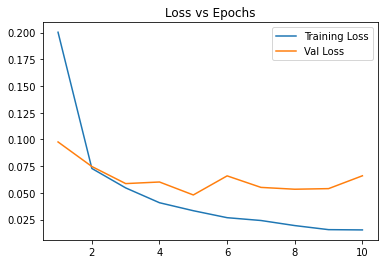

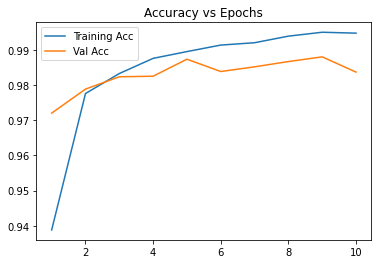

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()



plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

Plotting the result in terms of precision recall and f1-score

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test, batch_size=16, verbose=0)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.96      1.00      0.97      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Loading the pre-trained model of part1 dataset of 0-9 training images and testing the mnist dataset on this pre-trained model 


In [ ]:
filepath= "best_model.h5"
loaded_model = load_model(
    filepath,
    custom_objects=None,
    compile=True
)

Again loading the MNIST dataset
> **Data Preprocessing** 
> Steps are 
1. Reshaping into a volume (since the input to a CNN is Image)
2. Normalisation
3. One hot encoding of the labels   

In [ ]:
(x1_train,y1_train),(x1_test,y1_test) = mnist.load_data() 

In [ ]:
(x1_train,y1_train) = preprocess(x1_train, y1_train)
(x1_test,y1_test) = preprocess1(x1_test, y1_test)

In [ ]:
x1_train, y1_train =shuffle_in_unison(x1_train, y1_train)

**Compilation, Evaluation and Prediction**


 

In [ ]:
loaded_model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
# Generate a prediction with loaded model
loaded_model.predict(x1_train)

array([[7.5778589e-05, 2.3442801e-02, 4.4461906e-01, ..., 5.2632707e-01,
        2.2346042e-03, 1.9645453e-03],
       [7.7110896e-04, 4.7271072e-07, 1.9451372e-04, ..., 9.9819428e-01,
        3.2053729e-05, 7.2009803e-04],
       [2.1782913e-08, 1.0371982e-06, 1.8444119e-03, ..., 4.5578945e-05,
        1.7648251e-04, 1.7442784e-05],
       ...,
       [3.1976271e-07, 2.3132211e-03, 9.9755573e-01, ..., 4.4281631e-05,
        1.6553198e-05, 4.2740771e-07],
       [3.6022466e-05, 1.2246257e-11, 1.5677392e-08, ..., 6.2321112e-13,
        1.6231954e-05, 1.8343888e-10],
       [2.0396214e-05, 9.9778807e-01, 2.0051450e-05, ..., 2.1030348e-04,
        2.8734580e-06, 8.0879806e-07]], dtype=float32)

**Comparison**
1. First evaluation is the evaluation on randomly_initialised model
2. Second evaluation is the evaluation on pre-trained model on part1 digit dataset only   

In [ ]:
model.evaluate(x1_test, y1_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0644 - accuracy: 0.9860


[0.06441128253936768, 0.9860000014305115]

In [ ]:
loaded_model.evaluate(x1_test, y1_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.1260 - accuracy: 0.9605


[0.12598924338817596, 0.9605000019073486]

**Conclusion**
The observation is that the randomly intialised weights on the MNIST shows  higher accuracy(98.60) and half the loss than the pretrained model of subtask 1 on digits only(96.50).

> Reason being the features learnt by the model from the dataset of subtask 1 have been learnt more homogenously. Thus is not highly generalised. Also the weights are not being updated through backpropagation like in transfer learning, but only tht MNIST is evaluated on this pretrained model ; whereas in randomly initialised training, model learns MNIST features and thus giving better results in MNIST test_set.

   
